### MGS (SDSS Main Galaxy Sample, r<17.77) 'VAGC_MGS-m14_1777--20180116.fits'
### MGS galaxies got classification in  DECaLS footprint, i.e. GZ DECaLS --> "gz_decals_volunteers_ab.csv" "gz_decals_volunteers_c.csv"
### stamps of GZ DECaLS galaxies have been dowloaded and stored in either  /data/pair/nomerge/ or /data/pair/merge/ (i.e. merge.tar, nomerge.tar) 
### These DECaLS stamps are  matched with DECaLS catalog and generate "decals_ab_image.dat" "decals_c_image.dat" for convience
### MGS galaxies not in DECals footprint is listed in 'MGS_out_DECaLS.fits', these galaxies need AI morphology classfication. The stamps of these files are stored in MGS_out_DECaLS.tar

In [75]:
import astropy
from astropy.io import fits
import pandas as pd
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.table import Table

In [62]:
# read SDSS VAGC MGS sample
hdus=fits.open('VAGC_MGS-m14_1777--20180116.fits')
MGS=hdus[1].data
Ra=MGS['RA']
Dec=MGS['DEC']
redshift=MGS['Z']
zflag=MGS['ZFLAG']
NV=len(Ra)
print(NV,'gals in MGS catalog')

#read DECals GZ data
Decas_ab = pd.read_csv("gz_decals_volunteers_ab.csv")
Decas_c = pd.read_csv("gz_decals_volunteers_c.csv")
Ra1=Decas_ab['ra']
Dec1=Decas_ab['dec']
Ra2=Decas_c['ra']
Dec2=Decas_c['dec']
Ra_D=np.hstack((Ra1,Ra2))
Dec_D=np.hstack((Dec1,Dec2))

746950 gals in MGS catalog


In [67]:
vagc = SkyCoord(ra=Ra*u.degree, dec=Dec*u.degree)  
decals = SkyCoord(ra=Ra_D*u.degree, dec=Dec_D*u.degree)  
idx, d2d, d3d = decals.match_to_catalog_sky(vagc)
sel=np.where(d2d.degree < 0.00002)
Dflag=np.zeros(NV,dtype=int)
Dflag[idx]=1
sel2=np.where(Dflag == 0)
Nout=len(sel2[0])


476890 MGS galaxies not in DECals footprint


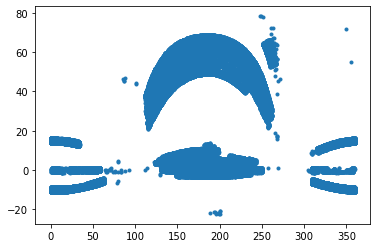

In [83]:
print(Nout,'MGS galaxies not in DECals footprint')
plt.plot(Ra[sel2[0][0:200000]],Dec[sel2[0]][0:200000],'.')
MGS_out=MGS[sel2]
Table(MGS_out).write('MGS_out_DECaLS.fits', format='fits')

In [94]:
check=fits.open('MGS_out_DECaLS.fits')
cdata=check[1].data

In [ ]:
import glob
from tqdm import trange

voteab = pd.read_csv("gz_decals_volunteers_ab.csv")
votec = pd.read_csv("gz_decals_volunteers_c.csv")
Nab=len(voteab)
Nc=len(votec)
fileout = open("decals_ab_image.dat", "w")
#filename=np.array(Nobj,dtype=object)
for i in trange(Nab):
    bname=str(voteab.iloc[i, 1])+'_'+str(voteab.iloc[i, 2])
    filename=bname+'_?.fits'
    fname1=glob.glob('/data/pair/nomerge/' + filename)
    fname='not exist'
    if len(fname1) !=0:
        fname=fname1[0]
    else:
        fname2=glob.glob('/data/pair/merge/' + filename)
        if len(fname2) !=0:
            fname=fname2[0]
    if fname == 'not exist':
        print(filename,'not exist')
    fname=os.path.basename(fname)
    #print(fname)
    fileout.write(fname+'\n')
fileout.close()

In [ ]:
fileout = open("decals_c_image.dat", "w")
#filename=np.array(Nobj,dtype=object)
for i in trange(Nc):
    bname=str(votec.iloc[i, 1])+'_'+str(votec.iloc[i, 2])
    filename=bname+'_?.fits'
    fname1=glob.glob('/data/pair/nomerge/' + filename)
    fname='not exist'
    if len(fname1) !=0:
        fname=fname1[0]
    else:
        fname2=glob.glob('/data/pair/merge/' + filename)
        if len(fname2) !=0:
            fname=fname2[0]
    if fname == 'not exist':
        print(filename,'not exist')
    fname=os.path.basename(fname)
    #print(fname)
    fileout.write(fname+'\n')
fileout.close()